In [14]:
from keras.datasets import mnist

In [15]:
# Carregando o dataset separando os dados de treino e de teste 
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [16]:
# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
from keras.utils import to_categorical
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

In [17]:
# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para achatar as imagens
x_treino_flat = x_treino_norm.reshape(len(x_treino_norm), 28*28)
x_teste_flat = x_teste_norm.reshape(len(x_teste_norm), 28*28)

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. 
"""

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. \n'

In [18]:
# Importação das bibliotecas necessárias para treinar a rede
from keras.models import Sequential
from keras.layers import Dense


In [19]:
# Criação do modelo linear
model = Sequential()
# Neumronios, ativação, input_shape
model.add(Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/rodrigo-07/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=adam)


In [22]:
historico = model.fit(x_treino_flat, y_treino_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8545 - loss: 0.0208 - val_accuracy: 0.9557 - val_loss: 0.0069
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9617 - loss: 0.0061 - val_accuracy: 0.9589 - val_loss: 0.0063
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9701 - loss: 0.0048 - val_accuracy: 0.9648 - val_loss: 0.0055
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9755 - loss: 0.0039 - val_accuracy: 0.9685 - val_loss: 0.0050
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9792 - loss: 0.0034 - val_accuracy: 0.9717 - val_loss: 0.0045


Text(0, 0.5, 'acuracia')

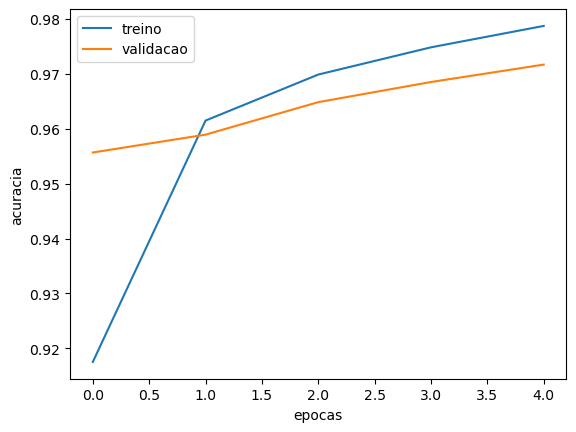

In [23]:
from matplotlib import pyplot as plt

# Exibe o histórico do treinamento
# Graficos de perda e acurácia
# Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

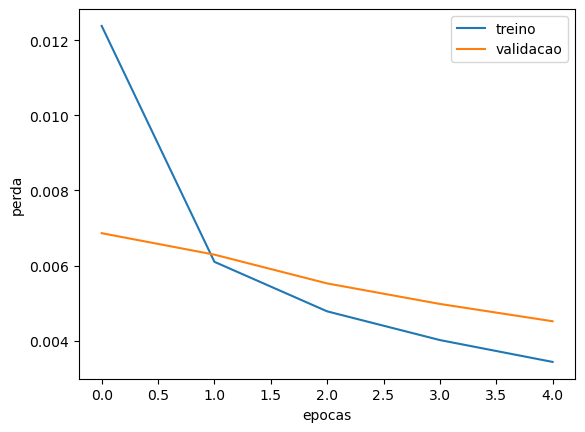

In [24]:
# Perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

In [25]:
# Salva o modelo
model.save('modelo_mnist_linear.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


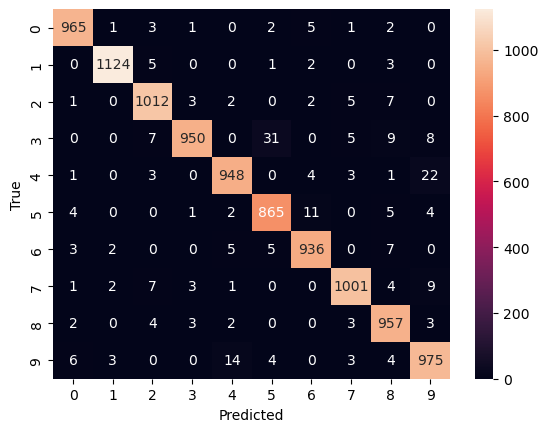

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(x_teste_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_teste_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
# Realiza uma predição com o modelo
predicao = model.predict(x_teste_flat[0].reshape(1, 28*28))
print(predicao)

np.argmax(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[1.7265103e-12 1.0964640e-08 3.1423223e-08 5.8063514e-09 2.7077943e-10
  2.2553552e-10 1.9490644e-10 1.0000000e+00 5.4362747e-12 9.1808205e-09]]


7

In [29]:
import numpy as np
from keras.preprocessing import image

# Carrega a imagem
img_path = 'imgTest/sete.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Converte a imagem para um array numpy
img = image.img_to_array(img)

# Normaliza a imagem
img = img / 255.0

# Remodela a imagem para o formato esperado pelo modelo
img = img.reshape(1, 28*28)

# Faz a predição
predicao = model.predict(img)

# Exibe a predição
print(predicao)
print(np.argmax(predicao))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[4.0770615e-03 6.9460222e-03 2.0781276e-03 4.4574784e-04 1.4866525e-03
  9.5582259e-01 1.7550582e-02 2.9900093e-03 4.4234754e-03 4.1797408e-03]]
5
